##  Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` is one of many that performs edge detection on an image. The `Op` works by calculating the [variance](https://en.wikipedia.org/wiki/Variance) of a [`Neighborhood`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Neighborhood.html) (via [`variance`](../stats/variance.ipynb)) at each pixel. Edge pixels will have higher variance (since the values are different on each side of an edge), thus leading to higher variance values at edges. Let's see how this `Op` is called:

In [2]:
ij.op().help("filter.variance")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.filter.variance.DefaultVarianceFilter(
		IterableInterval out,
		RandomAccessibleInterval in,
		Shape shape,
		OutOfBoundsFactory outOfBoundsFactory?)

Let's take a look at the parameters:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in`: the input image
* `Shape shape`: the [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html) that the `Op` will make `Neighborhood`s in
* `OutOfBoundsFactory outOfBoundsFactory`: an **optional** parameter defining how the `Op` should make the `Neighborhood`s at the edges of the image.

Let's show an example:

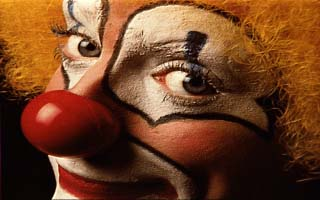

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

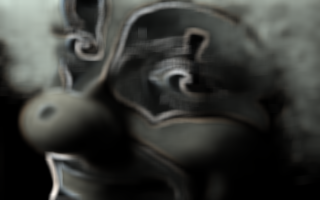

In [4]:
import net.imglib2.algorithm.neighborhood.RectangleShape

//convert the image to FloatType so that we can have decimal outputs (if we do not do this our calculated values get floored, which will not look good)
converted = ij.op().run("convert.float32", input)

//create the required arguments and run the Op
shape = new RectangleShape(4, true)
output = ij.op().run("create.img", converted)
ij.op().run("filter.variance", output, converted, shape)

ij.notebook().display(output)

Note that some edges show well  but some regions of the image (like the nose and hair) show bright as well. This is because the `Op` determines high variance between the channels within those regions (i.e. the high red values in the nose and the low green and blue values make that value seem like an edge). We can fix this by running [`slice`](../slice.ipynb) on each channel of the `Op`:

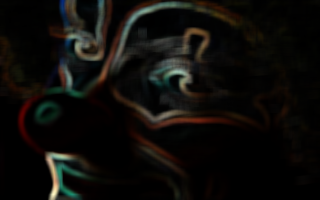

In [5]:
import net.imagej.ops.Ops
import net.imagej.ops.special.computer.Computers

//create the Op instance
varianceOp = Computers.unary(ij.op(), Ops.Filter.Variance.class, output, converted, shape)

//run slice on each channel (hence indices of 0 and 1)
axisIndices = [0, 1] as int[]
ij.op().run("slice", output, converted, varianceOp, axisIndices)

//TODO show side by side with input
ij.notebook().display(output)